In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import pickle

In [2]:
dataset=pd.read_csv("Breast Cancer Diagnostic.csv ")
dataset.head()

ID number  radius  texture  perimeter    area  smoothness  compactness  \
0     842302   17.99    10.38     122.80  1001.0     0.11840      0.27760   
1     842517   20.57    17.77     132.90  1326.0     0.08474      0.07864   
2   84300903   19.69    21.25     130.00  1203.0     0.10960      0.15990   
3   84348301   11.42    20.38      77.58   386.1     0.14250      0.28390   
4   84358402   20.29    14.34     135.10  1297.0     0.10030      0.13280   

   concavity  concave points  symmetry  ...  Worst texture  Worst perimeter  \
0     0.3001         0.14710    0.2419  ...          17.33           184.60   
1     0.0869         0.07017    0.1812  ...          23.41           158.80   
2     0.1974         0.12790    0.2069  ...          25.53           152.50   
3     0.2414         0.10520    0.2597  ...          26.50            98.87   
4     0.1980         0.10430    0.1809  ...          16.67           152.20   

   Worst area  Worst smoothness  Worst compactness  Worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   Worst concave points  Worst symmetry  Worst fractal dimension  Diagnosis  
0                0.2654          0.4601                  0.11890          M  
1                0.1860          0.2750                  0.08902          M  
2                0.2430          0.3613                  0.08758          M  
3                0.2575          0.6638                  0.17300          M  
4                0.1625          0.2364                  0.07678          M  

[5 rows x 32 columns]

In [3]:
dataset.drop("ID number",axis=1,inplace=True)

In [4]:
dataset.head()

radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
1   20.57    17.77     132.90  1326.0     0.08474      0.07864     0.0869   
2   19.69    21.25     130.00  1203.0     0.10960      0.15990     0.1974   
3   11.42    20.38      77.58   386.1     0.14250      0.28390     0.2414   
4   20.29    14.34     135.10  1297.0     0.10030      0.13280     0.1980   

   concave points  symmetry  fractal dimension  ...  Worst texture  \
0         0.14710    0.2419            0.07871  ...          17.33   
1         0.07017    0.1812            0.05667  ...          23.41   
2         0.12790    0.2069            0.05999  ...          25.53   
3         0.10520    0.2597            0.09744  ...          26.50   
4         0.10430    0.1809            0.05883  ...          16.67   

   Worst perimeter  Worst area  Worst smoothness  Worst compactness  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   Worst concavity  Worst concave points  Worst symmetry  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   Worst fractal dimension  Diagnosis  
0                  0.11890          M  
1                  0.08902          M  
2                  0.08758          M  
3                  0.17300          M  
4                  0.07678          M  

[5 rows x 31 columns]

In [5]:
dataset.describe().T

count        mean         std         min  \
radius                   569.0   14.127292    3.524049    6.981000   
texture                  569.0   19.289649    4.301036    9.710000   
perimeter                569.0   91.969033   24.298981   43.790000   
area                     569.0  654.889104  351.914129  143.500000   
smoothness               569.0    0.096360    0.014064    0.052630   
compactness              569.0    0.104341    0.052813    0.019380   
concavity                569.0    0.088799    0.079720    0.000000   
concave points           569.0    0.048919    0.038803    0.000000   
symmetry                 569.0    0.181162    0.027414    0.106000   
fractal dimension        569.0    0.062798    0.007060    0.049960   
Radius SE                569.0    0.405172    0.277313    0.111500   
texture SE               569.0    1.216853    0.551648    0.360200   
perimeter SE             569.0    2.866059    2.021855    0.757000   
area SE                  569.0   40.337079   45.491006    6.802000   
smoothness SE            569.0    0.007041    0.003003    0.001713   
compactness SE           569.0    0.025478    0.017908    0.002252   
concavity SE             569.0    0.031894    0.030186    0.000000   
concave points SE        569.0    0.011796    0.006170    0.000000   
symmetry SE              569.0    0.020542    0.008266    0.007882   
fractal dimension SE     569.0    0.003795    0.002646    0.000895   
Worst Radius             569.0   16.269190    4.833242    7.930000   
Worst texture            569.0   25.677223    6.146258   12.020000   
Worst perimeter          569.0  107.261213   33.602542   50.410000   
Worst area               569.0  880.583128  569.356993  185.200000   
Worst smoothness         569.0    0.132369    0.022832    0.071170   
Worst compactness        569.0    0.254265    0.157336    0.027290   
Worst concavity          569.0    0.272188    0.208624    0.000000   
Worst concave points     569.0    0.114606    0.065732    0.000000   
Worst symmetry           569.0    0.290076    0.061867    0.156500   
Worst fractal dimension  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
radius                    11.700000   13.370000    15.780000    28.11000  
texture                   16.170000   18.840000    21.800000    39.28000  
perimeter                 75.170000   86.240000   104.100000   188.50000  
area                     420.300000  551.100000   782.700000  2501.00000  
smoothness                 0.086370    0.095870     0.105300     0.16340  
compactness                0.064920    0.092630     0.130400     0.34540  
concavity                  0.029560    0.061540     0.130700     0.42680  
concave points             0.020310    0.033500     0.074000     0.20120  
symmetry                   0.161900    0.179200     0.195700     0.30400  
fractal dimension          0.057700    0.061540     0.066120     0.09744  
Radius SE                  0.232400    0.324200     0.478900     2.87300  
texture SE                 0.833900    1.108000     1.474000     4.88500  
perimeter SE               1.606000    2.287000     3.357000    21.98000  
area SE                   17.850000   24.530000    45.190000   542.20000  
smoothness SE              0.005169    0.006380     0.008146     0.03113  
compactness SE             0.013080    0.020450     0.032450     0.13540  
concavity SE               0.015090    0.025890     0.042050     0.39600  
concave points SE          0.007638    0.010930     0.014710     0.05279  
symmetry SE                0.015160    0.018730     0.023480     0.07895  
fractal dimension SE       0.002248    0.003187     0.004558     0.02984  
Worst Radius              13.010000   14.970000    18.790000    36.04000  
Worst texture             21.080000   25.410000    29.720000    49.54000  
Worst perimeter           84.110000   97.660000   125.400000   251.20000  
Worst area               515.300000  686.500000  1084.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius                   569 non-null    float64
 1   texture                  569 non-null    float64
 2   perimeter                569 non-null    float64
 3   area                     569 non-null    float64
 4   smoothness               569 non-null    float64
 5   compactness              569 non-null    float64
 6   concavity                569 non-null    float64
 7   concave points           569 non-null    float64
 8   symmetry                 569 non-null    float64
 9   fractal dimension        569 non-null    float64
 10  Radius SE                569 non-null    float64
 11  texture SE               569 non-null    float64
 12  perimeter SE             569 non-null    float64
 13  area SE                  569 non-null    float64
 14  smoothness SE            5

In [7]:
dataset[dataset.duplicated()].count()

radius                     0
texture                    0
perimeter                  0
area                       0
smoothness                 0
compactness                0
concavity                  0
concave points             0
symmetry                   0
fractal dimension          0
Radius SE                  0
texture SE                 0
perimeter SE               0
area SE                    0
smoothness SE              0
compactness SE             0
concavity SE               0
concave points SE          0
symmetry SE                0
fractal dimension SE       0
Worst Radius               0
Worst texture              0
Worst perimeter            0
Worst area                 0
Worst smoothness           0
Worst compactness          0
Worst concavity            0
Worst concave points       0
Worst symmetry             0
Worst fractal dimension    0
Diagnosis                  0
dtype: int64

In [8]:
dataset.isnull().sum()

radius                     0
texture                    0
perimeter                  0
area                       0
smoothness                 0
compactness                0
concavity                  0
concave points             0
symmetry                   0
fractal dimension          0
Radius SE                  0
texture SE                 0
perimeter SE               0
area SE                    0
smoothness SE              0
compactness SE             0
concavity SE               0
concave points SE          0
symmetry SE                0
fractal dimension SE       0
Worst Radius               0
Worst texture              0
Worst perimeter            0
Worst area                 0
Worst smoothness           0
Worst compactness          0
Worst concavity            0
Worst concave points       0
Worst symmetry             0
Worst fractal dimension    0
Diagnosis                  0
dtype: int64

In [9]:
dataset.nunique()

radius                     456
texture                    479
perimeter                  522
area                       539
smoothness                 474
compactness                537
concavity                  537
concave points             542
symmetry                   432
fractal dimension          499
Radius SE                  540
texture SE                 519
perimeter SE               533
area SE                    528
smoothness SE              547
compactness SE             541
concavity SE               533
concave points SE          507
symmetry SE                498
fractal dimension SE       545
Worst Radius               457
Worst texture              511
Worst perimeter            514
Worst area                 544
Worst smoothness           411
Worst compactness          529
Worst concavity            539
Worst concave points       492
Worst symmetry             500
Worst fractal dimension    535
Diagnosis                    2
dtype: int64

# Analysis of Features

<AxesSubplot:xlabel='Diagnosis', ylabel='count'>

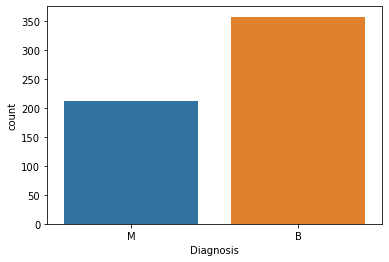

In [10]:
sns.countplot(data=dataset,x="Diagnosis")

In [11]:
num=[feature for feature in dataset.columns if dataset[feature].dtypes!="O"]
num

['radius',
 'texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'concavity',
 'concave points',
 'symmetry',
 'fractal dimension',
 'Radius SE',
 'texture SE',
 'perimeter SE',
 'area SE',
 'smoothness SE',
 'compactness SE',
 'concavity SE',
 'concave points SE',
 'symmetry SE',
 'fractal dimension SE',
 'Worst Radius',
 'Worst texture',
 'Worst perimeter',
 'Worst area',
 'Worst smoothness',
 'Worst compactness',
 'Worst concavity',
 'Worst concave points',
 'Worst symmetry',
 'Worst fractal dimension']

In [12]:
dataset[num].max()-dataset[num].min()

radius                       21.129000
texture                      29.570000
perimeter                   144.710000
area                       2357.500000
smoothness                    0.110770
compactness                   0.326020
concavity                     0.426800
concave points                0.201200
symmetry                      0.198000
fractal dimension             0.047480
Radius SE                     2.761500
texture SE                    4.524800
perimeter SE                 21.223000
area SE                     535.398000
smoothness SE                 0.029417
compactness SE                0.133148
concavity SE                  0.396000
concave points SE             0.052790
symmetry SE                   0.071068
fractal dimension SE          0.028945
Worst Radius                 28.110000
Worst texture                37.520000
Worst perimeter             200.790000
Worst area                 4068.800000
Worst smoothness              0.151430
Worst compactness        

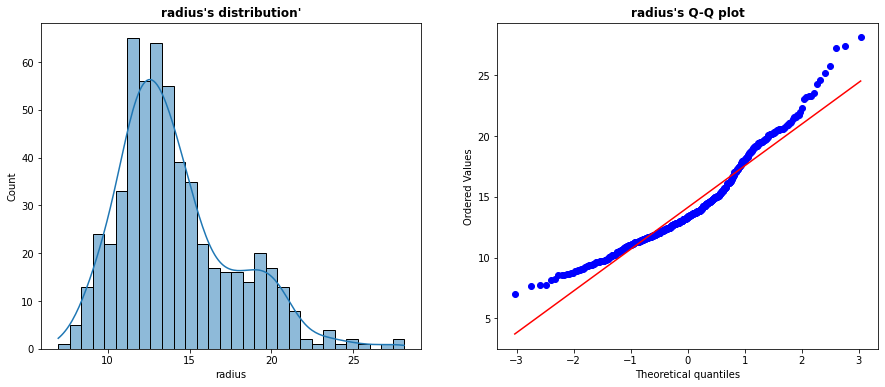

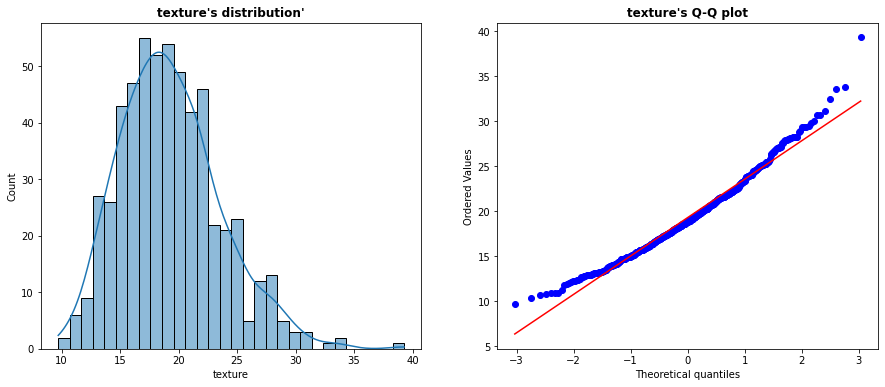

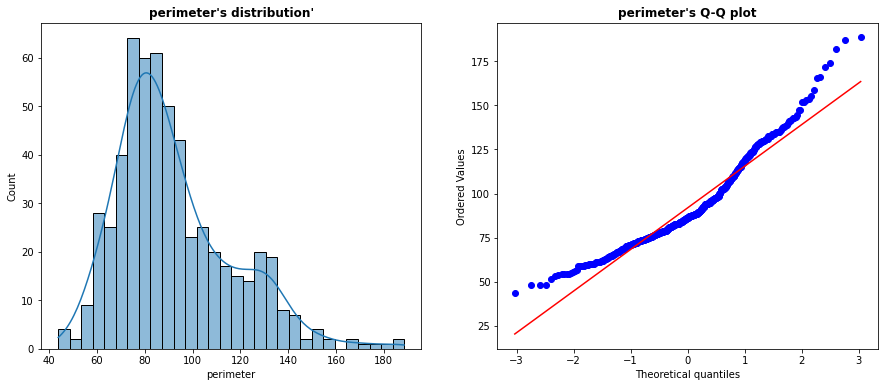

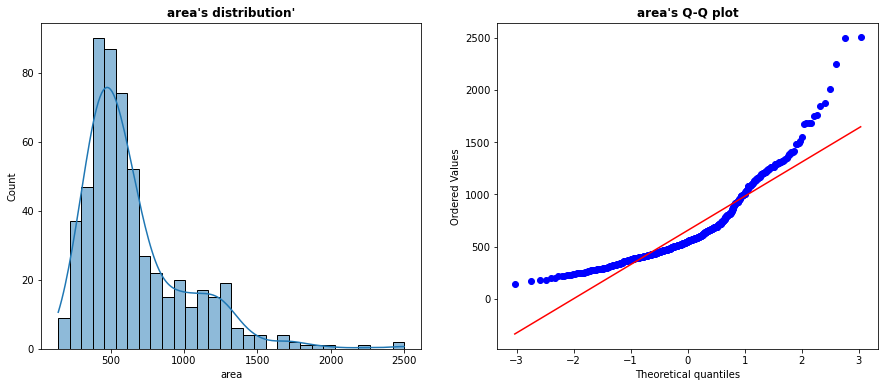

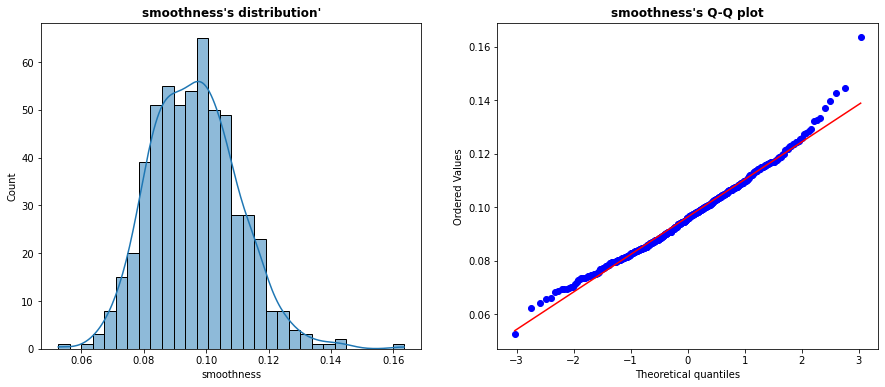

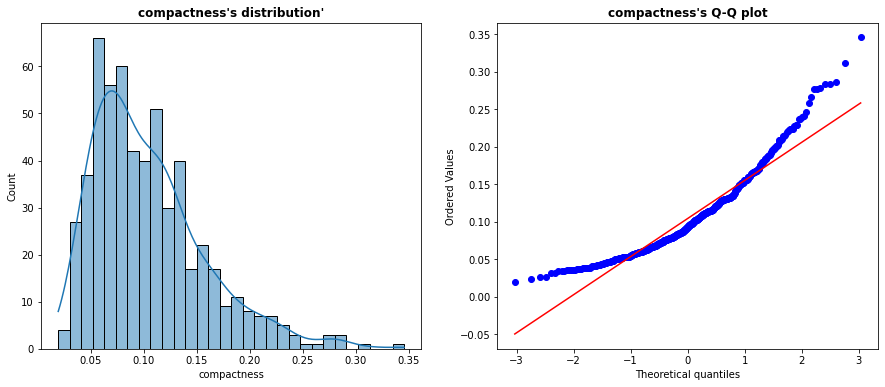

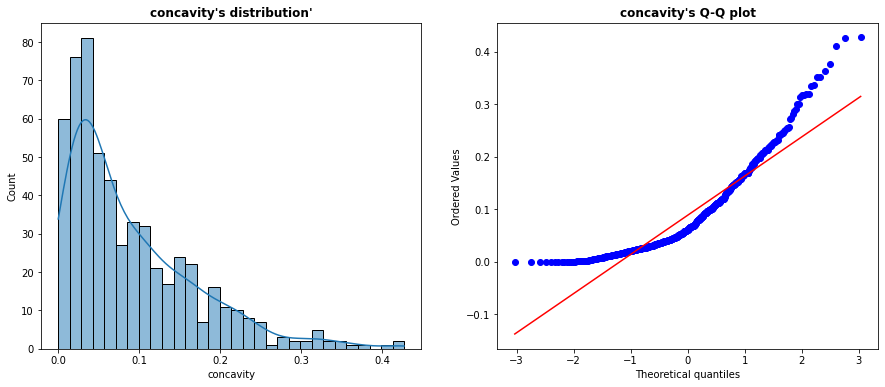

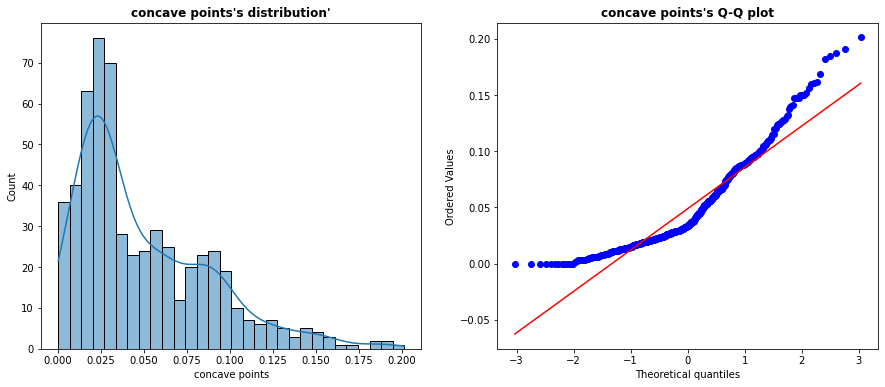

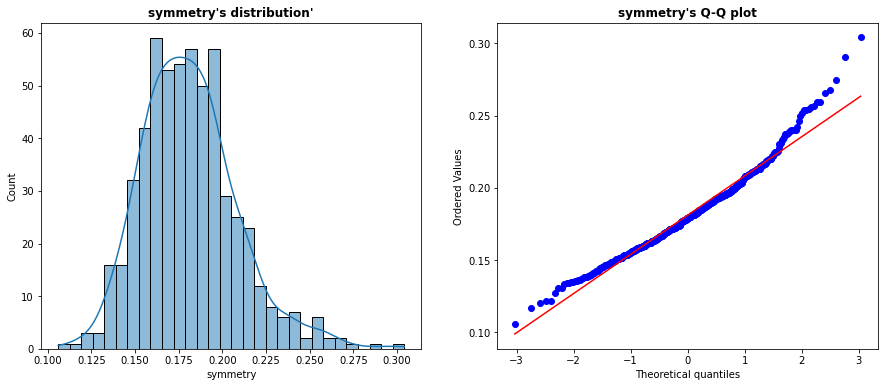

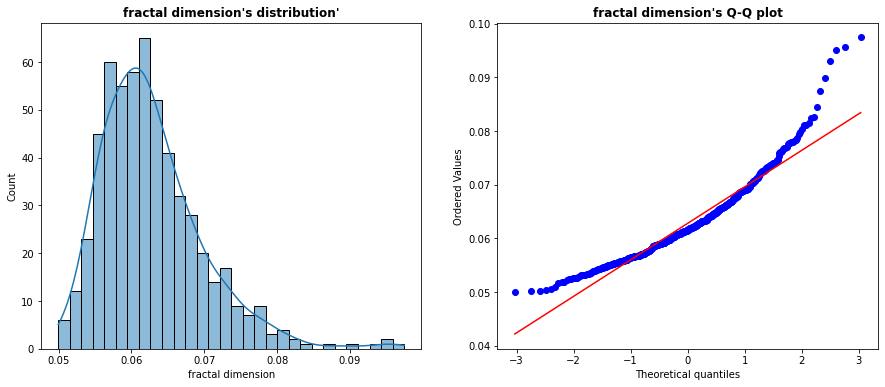

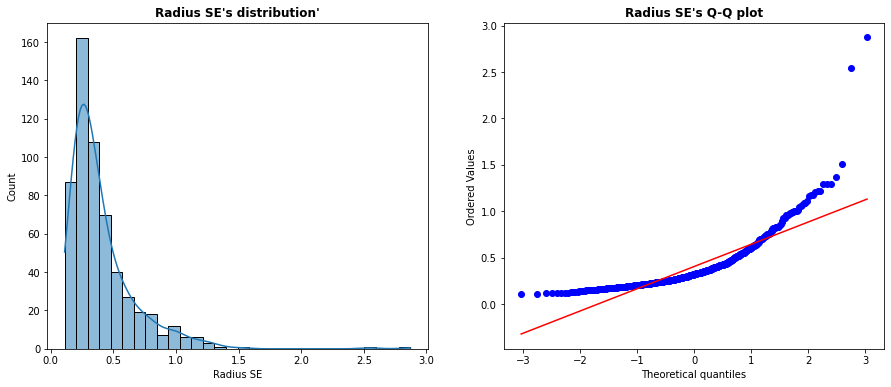

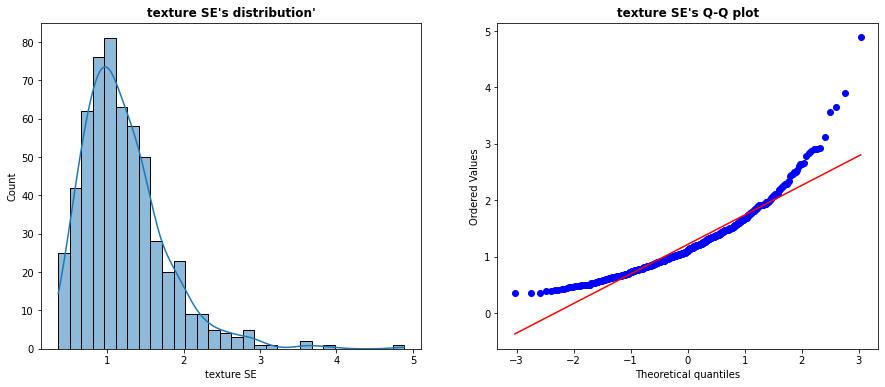

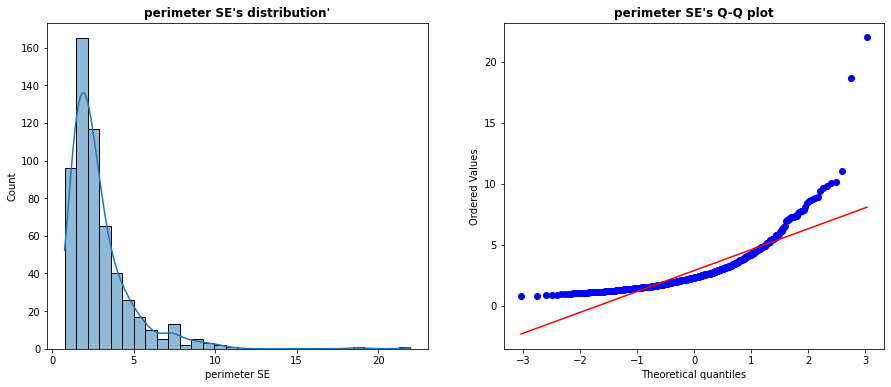

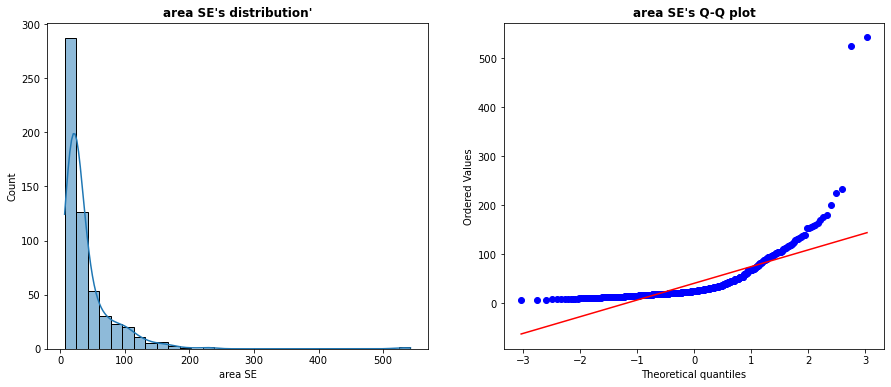

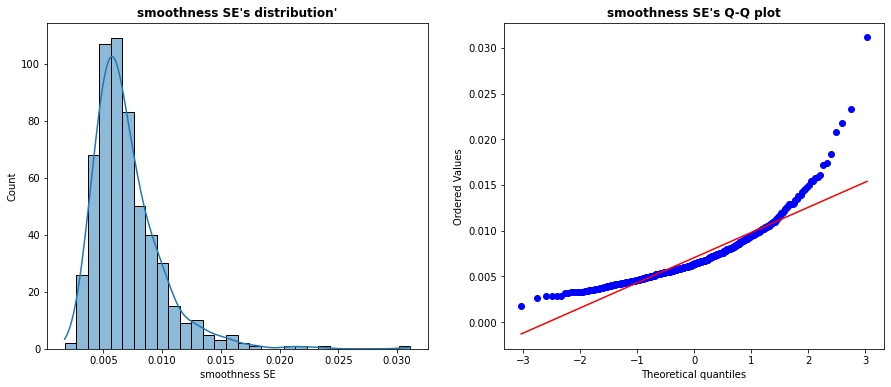

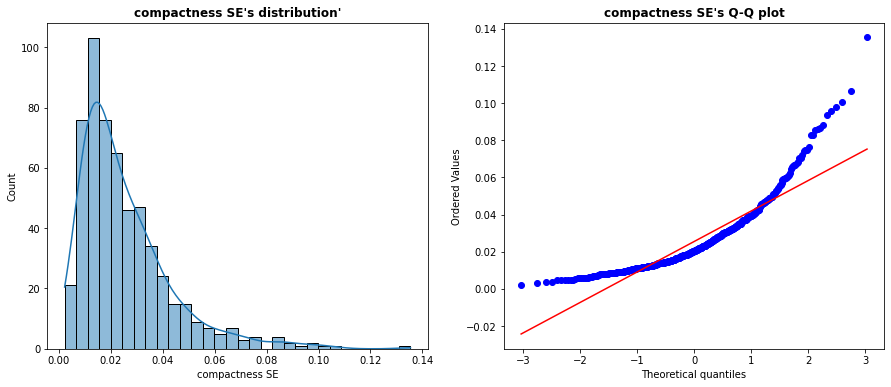

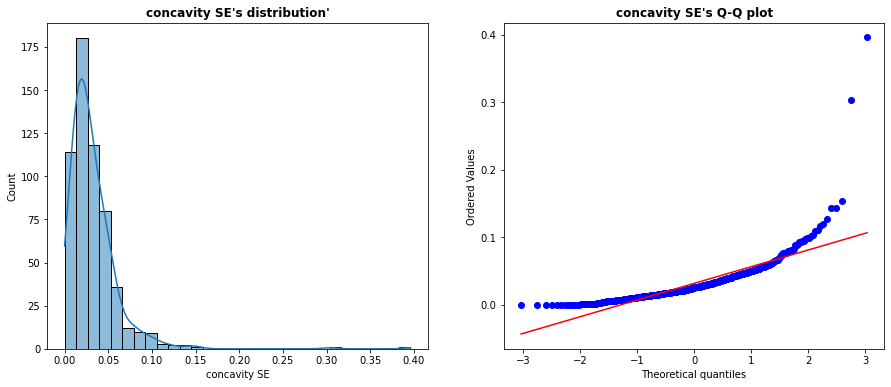

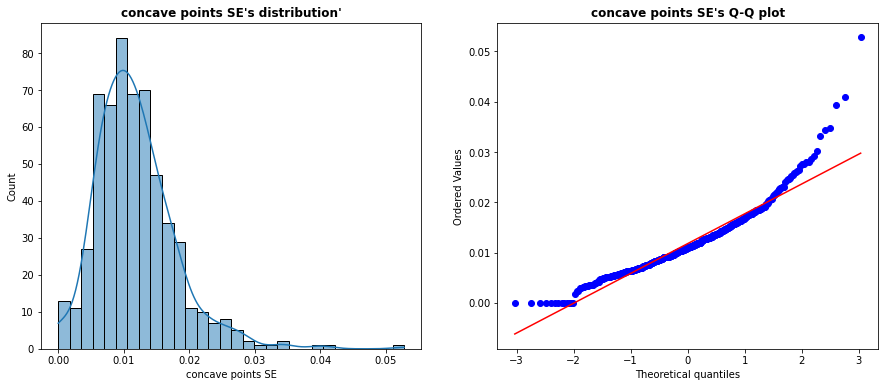

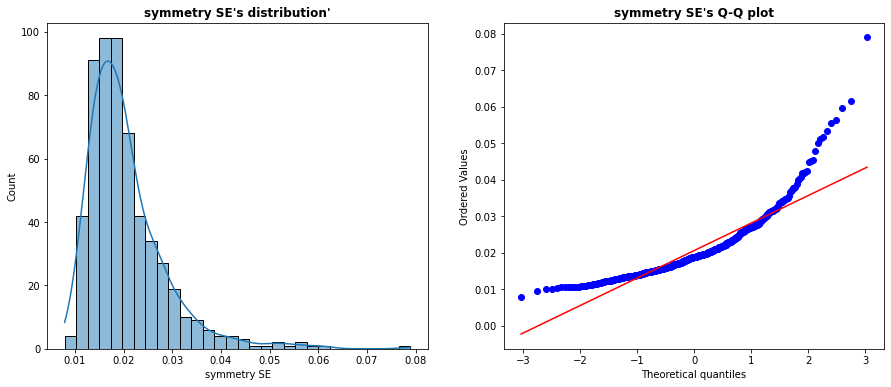

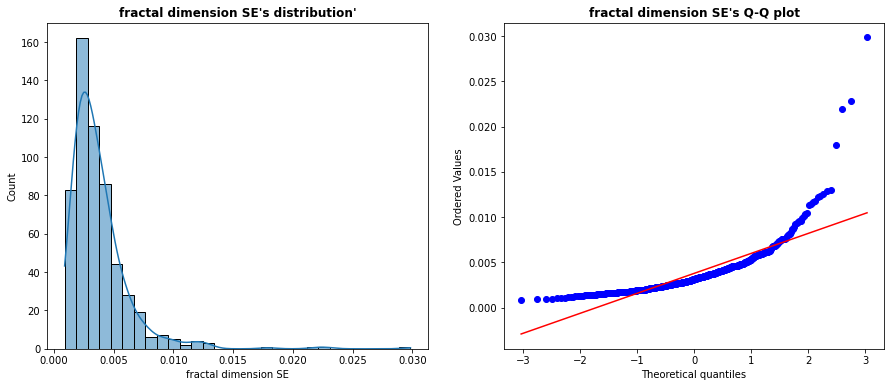

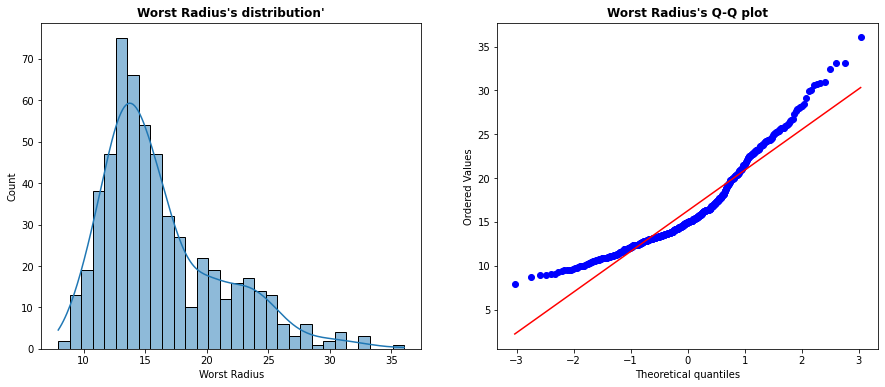

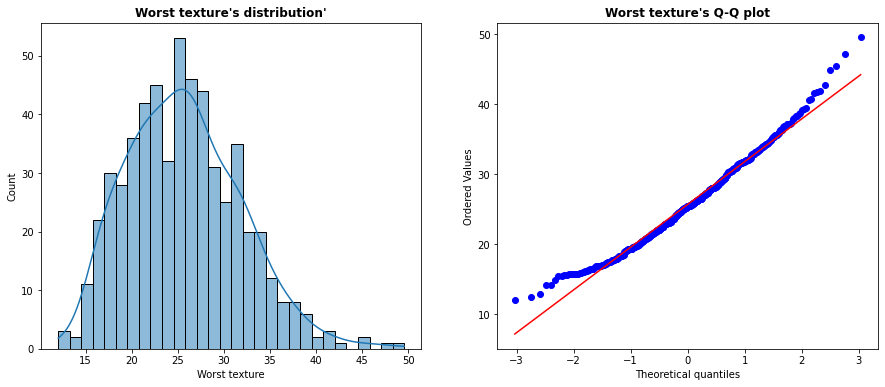

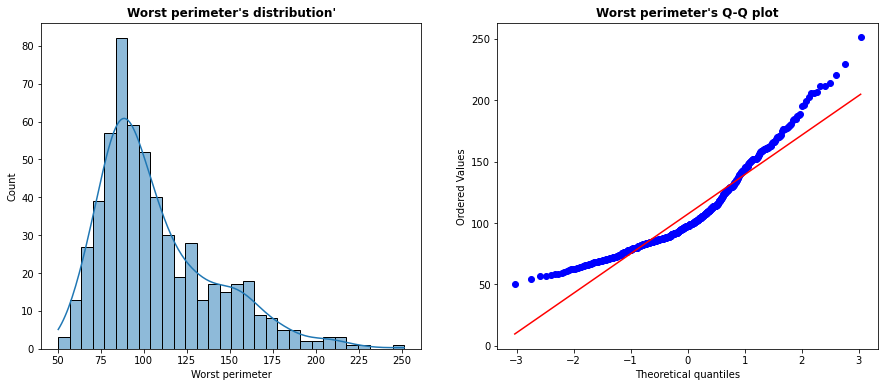

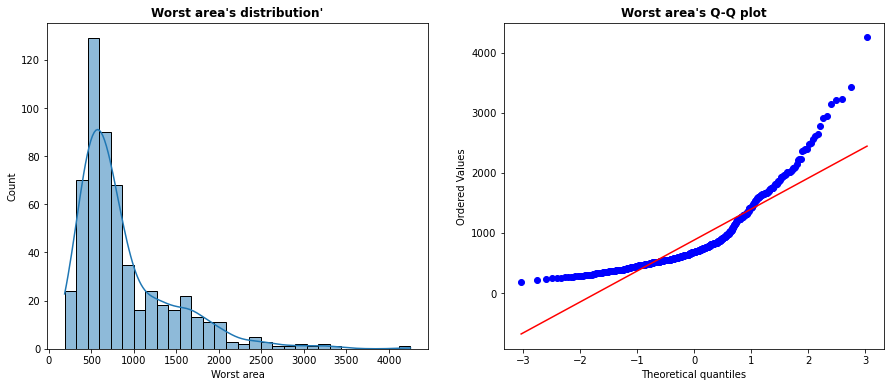

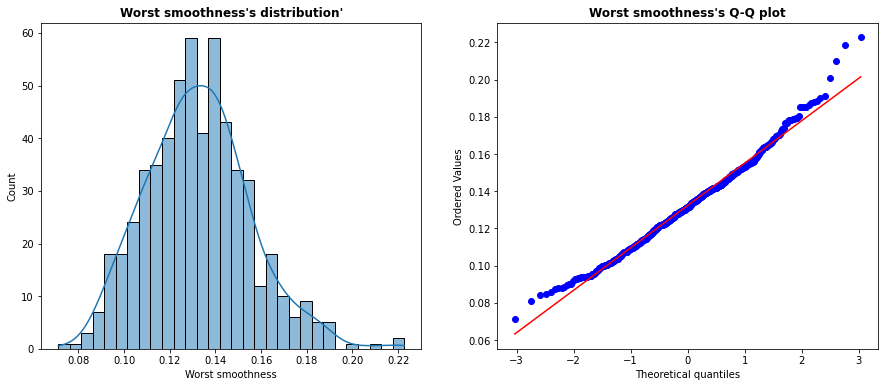

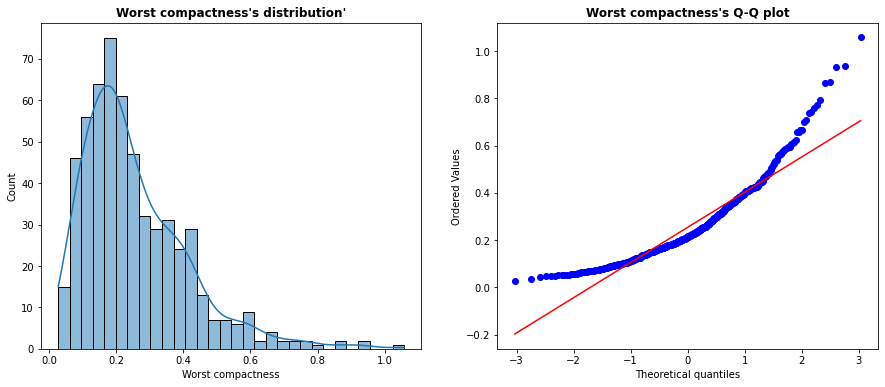

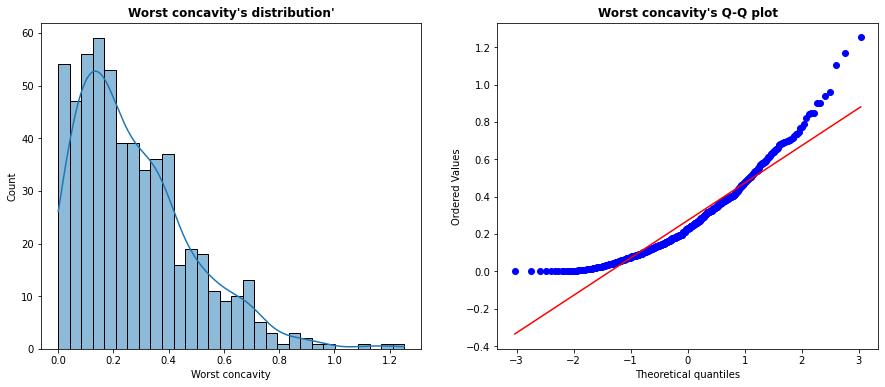

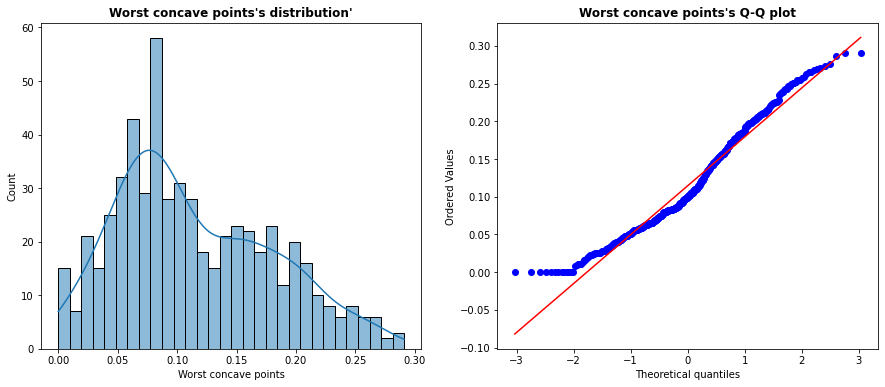

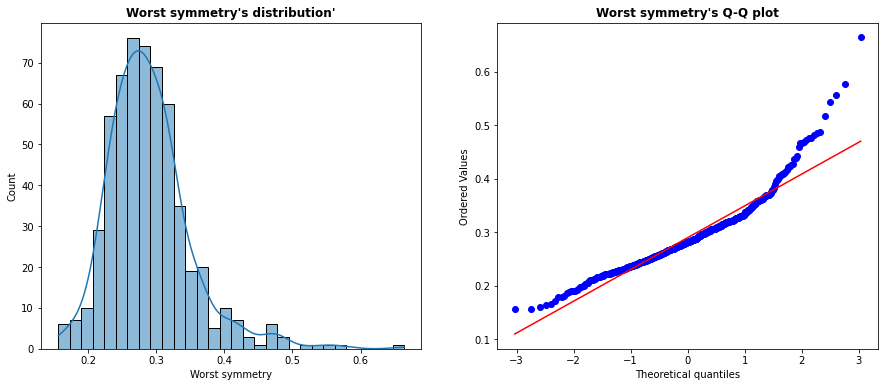

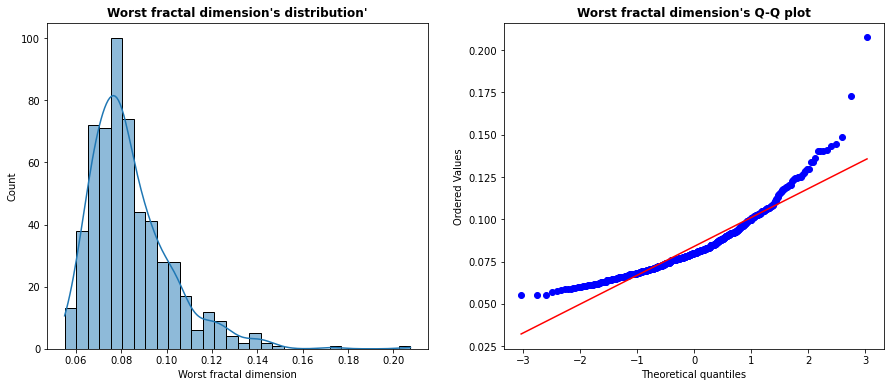

In [13]:
for i in num:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=dataset,x=i,kde=True,bins=30)
    plt.title("{}'s distribution'".format(i),fontweight="bold")
    
    plt.subplot(122)
    st.probplot(dataset[i],dist="norm",plot=plt)
    plt.title("{}'s Q-Q plot".format(i),fontweight="bold")
    plt.show()

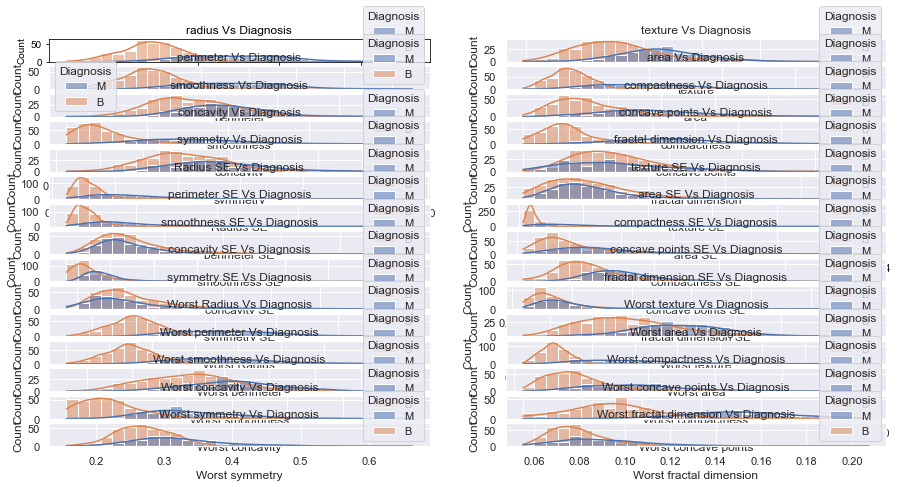

In [14]:
plt.figure(figsize=(15,8))
for i in enumerate(num):
    plt.subplot(16,2,i[0]+1)
    sns.set(rc={"figure.figsize":(7,7)})
    sns.histplot(data=dataset,x=i[1],kde=True,bins=30,color="blue",hue="Diagnosis")
    plt.title("{} Vs Diagnosis".format(i[1],fontweight="bold"))

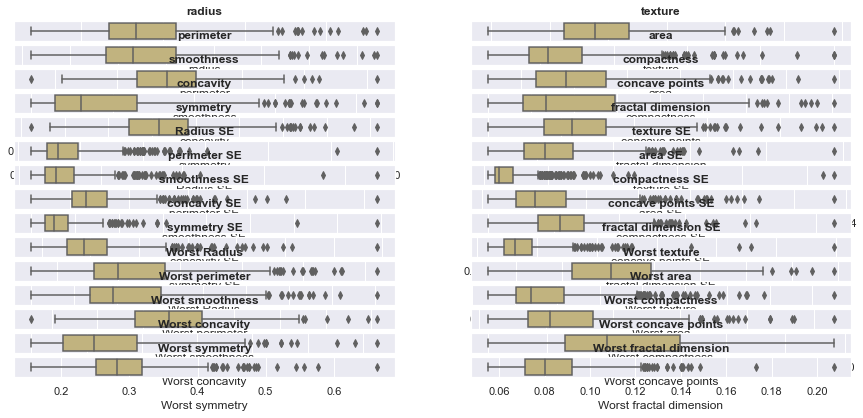

In [15]:
plt.figure(figsize=(15,7))
for i in enumerate(num):
    plt.subplot(16,2,i[0]+1)
    sns.set(rc={"figure.figsize":(17,19)})
    sns.boxplot(data=dataset,x=i[1],color="y")
    plt.title("{}".format(i[1]),fontweight="bold")

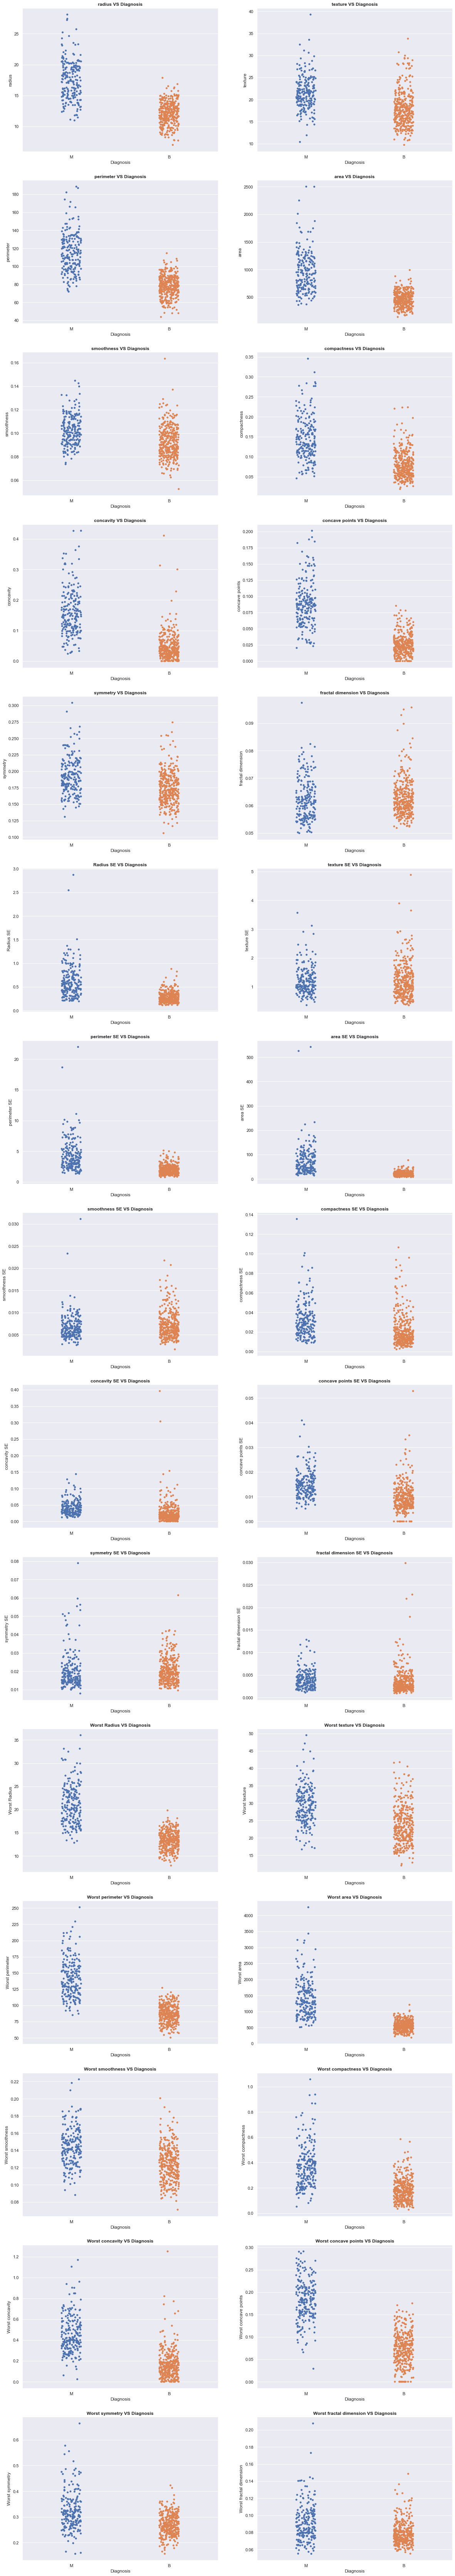

In [16]:
plt.figure(figsize=(20,130))
for i in enumerate(num):
    plt.subplot(16,2,i[0]+1)
    sns.set(rc={"figure.figsize":(20,17)})
    sns.stripplot(data=dataset,y=i[1],x="Diagnosis")
    plt.title("{} VS Diagnosis".format(i[1]),fontweight="bold")

In [17]:
corr=round(dataset[num+["Diagnosis"]].corr(),2)
corr

radius  texture  perimeter  area  smoothness  \
radius                     1.00     0.32       1.00  0.99        0.17   
texture                    0.32     1.00       0.33  0.32       -0.02   
perimeter                  1.00     0.33       1.00  0.99        0.21   
area                       0.99     0.32       0.99  1.00        0.18   
smoothness                 0.17    -0.02       0.21  0.18        1.00   
compactness                0.51     0.24       0.56  0.50        0.66   
concavity                  0.68     0.30       0.72  0.69        0.52   
concave points             0.82     0.29       0.85  0.82        0.55   
symmetry                   0.15     0.07       0.18  0.15        0.56   
fractal dimension         -0.31    -0.08      -0.26 -0.28        0.58   
Radius SE                  0.68     0.28       0.69  0.73        0.30   
texture SE                -0.10     0.39      -0.09 -0.07        0.07   
perimeter SE               0.67     0.28       0.69  0.73        0.30   
area SE                    0.74     0.26       0.74  0.80        0.25   
smoothness SE             -0.22     0.01      -0.20 -0.17        0.33   
compactness SE             0.21     0.19       0.25  0.21        0.32   
concavity SE               0.19     0.14       0.23  0.21        0.25   
concave points SE          0.38     0.16       0.41  0.37        0.38   
symmetry SE               -0.10     0.01      -0.08 -0.07        0.20   
fractal dimension SE      -0.04     0.05      -0.01 -0.02        0.28   
Worst Radius               0.97     0.35       0.97  0.96        0.21   
Worst texture              0.30     0.91       0.30  0.29        0.04   
Worst perimeter            0.97     0.36       0.97  0.96        0.24   
Worst area                 0.94     0.34       0.94  0.96        0.21   
Worst smoothness           0.12     0.08       0.15  0.12        0.81   
Worst compactness          0.41     0.28       0.46  0.39        0.47   
Worst concavity            0.53     0.30       0.56  0.51        0.43   
Worst concave points       0.74     0.30       0.77  0.72        0.50   
Worst symmetry             0.16     0.11       0.19  0.14        0.39   
Worst fractal dimension    0.01     0.12       0.05  0.00        0.50   

                         compactness  concavity  concave points  symmetry  \
radius                          0.51       0.68            0.82      0.15   
texture                         0.24       0.30            0.29      0.07   
perimeter                       0.56       0.72            0.85      0.18   
area                            0.50       0.69            0.82      0.15   
smoothness                      0.66       0.52            0.55      0.56   
compactness                     1.00       0.88            0.83      0.60   
concavity                       0.88       1.00            0.92      0.50   
concave points                  0.83       0.92            1.00      0.46   
symmetry                        0.60       0.50            0.46      1.00   
fractal dimension               0.57       0.34            0.17      0.48   
Radius SE                       0.50       0.63            0.70      0.30   
texture SE                      0.05       0.08            0.02      0.13   
perimeter SE                    0.55       0.66            0.71      0.31   
area SE                         0.46       0.62            0.69      0.22   
smoothness SE                   0.14       0.10            0.03      0.19   
compactness SE                  0.74       0.67            0.49      0.42   
concavity SE                    0.57       0.69            0.44      0.34   
concave points SE               0.64       0.68            0.62      0.39   
symmetry SE                     0.23       0.18            0.10      0.45   
fractal dimension SE            0.51       0.45            0.26      0.33   
Worst Radius                    0.54       0.69            0.83      0.19   
Worst texture                   0.25       0.30            0.29    

<AxesSubplot:>

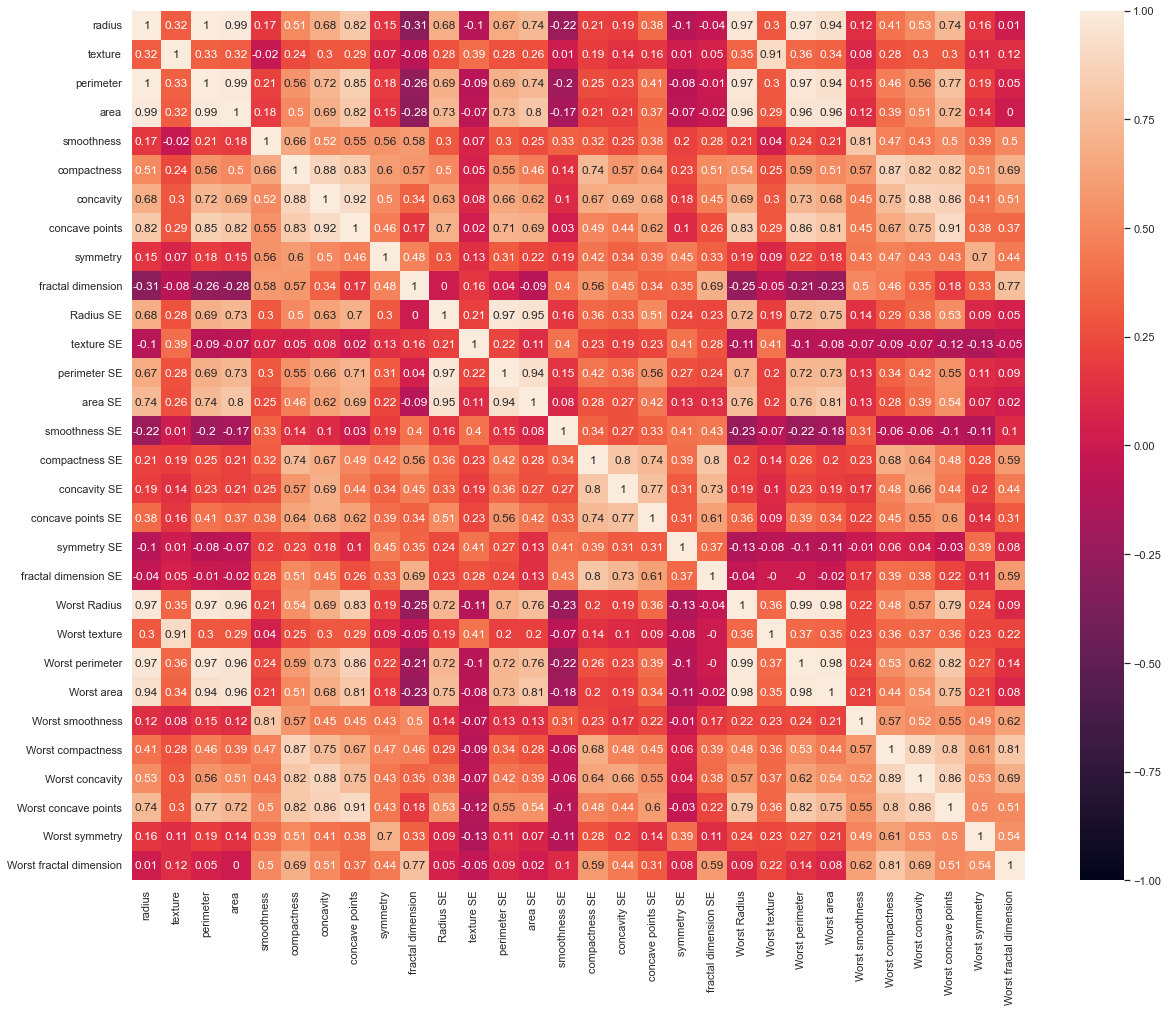

In [18]:
sns.set(rc={"figure.figsize":(20,16)})
sns.heatmap(data=corr,annot=True,vmin=-1,vmax=1)

In [19]:
data=dataset.copy()

In [20]:
data["Diagnosis"]=data["Diagnosis"].replace("B","0")
data["Diagnosis"]=data["Diagnosis"].replace("M","1")
data["Diagnosis"]=data["Diagnosis"].astype("int64")


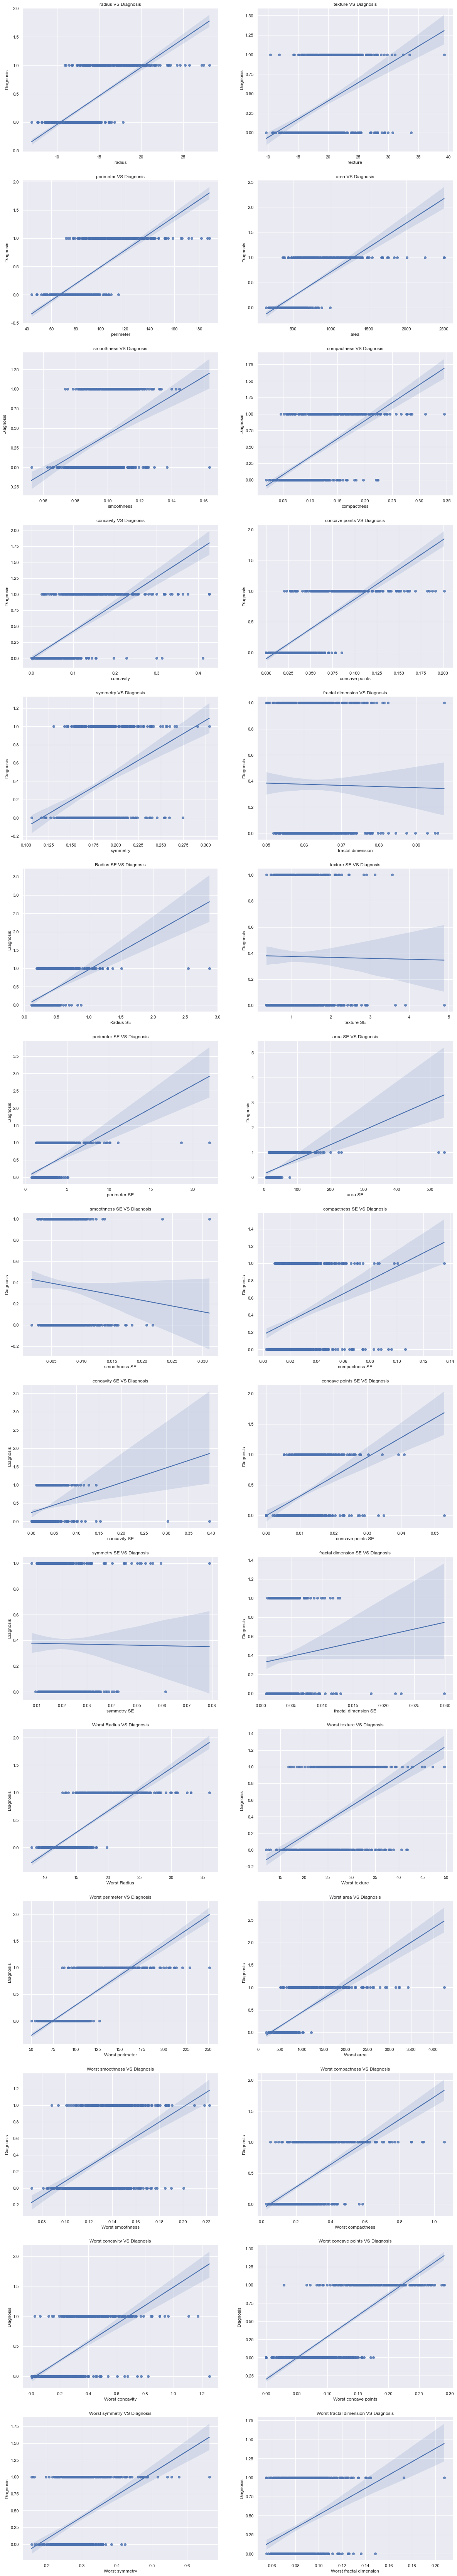

In [21]:
plt.figure(figsize=(20,130))
for i in enumerate(num):
    plt.subplot(16,2,i[0]+1)
    sns.set(rc={"figure.figsize":(15,15)})
    sns.regplot(data=data,x=i[1],y="Diagnosis")
    plt.xlabel(i[1])
    plt.ylabel("Diagnosis")
    plt.title("{} VS Diagnosis".format(i[1]))

# Model Building

In [22]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X.head()

radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
1   20.57    17.77     132.90  1326.0     0.08474      0.07864     0.0869   
2   19.69    21.25     130.00  1203.0     0.10960      0.15990     0.1974   
3   11.42    20.38      77.58   386.1     0.14250      0.28390     0.2414   
4   20.29    14.34     135.10  1297.0     0.10030      0.13280     0.1980   

   concave points  symmetry  fractal dimension  ...  Worst Radius  \
0         0.14710    0.2419            0.07871  ...         25.38   
1         0.07017    0.1812            0.05667  ...         24.99   
2         0.12790    0.2069            0.05999  ...         23.57   
3         0.10520    0.2597            0.09744  ...         14.91   
4         0.10430    0.1809            0.05883  ...         22.54   

   Worst texture  Worst perimeter  Worst area  Worst smoothness  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   Worst compactness  Worst concavity  Worst concave points  Worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   Worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 30 columns]

In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int64

# Splitting Train-Test Data

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)
X_train.head()

radius  texture  perimeter    area  smoothness  compactness  concavity  \
18    19.81    22.15     130.00  1260.0     0.09831      0.10270    0.14790   
213   17.42    25.56     114.50   948.0     0.10060      0.11460    0.16820   
532   13.68    16.33      87.76   575.5     0.09277      0.07255    0.01752   
191   12.77    21.41      82.02   507.4     0.08749      0.06601    0.03112   
235   14.03    21.25      89.79   603.4     0.09070      0.06945    0.01462   

     concave points  symmetry  fractal dimension  ...  Worst Radius  \
18          0.09498    0.1582            0.05395  ...         27.32   
213         0.06597    0.1308            0.05866  ...         18.07   
532         0.01880    0.1631            0.06155  ...         15.85   
191         0.02864    0.1694            0.06287  ...         13.75   
235         0.01896    0.1517            0.05835  ...         15.33   

     Worst texture  Worst perimeter  Worst area  Worst smoothness  \
18           30.88           186.80      2398.0           0.15120   
213          28.07           120.40      1021.0           0.12430   
532          20.20           101.60       773.4           0.12640   
191          23.50            89.04       579.5           0.09388   
235          30.28            98.27       715.5           0.12870   

     Worst compactness  Worst concavity  Worst concave points  Worst symmetry  \
18             0.31500          0.53720               0.23880          0.2768   
213            0.17930          0.28030               0.10990          0.1603   
532            0.15640          0.12060               0.08704          0.2806   
191            0.08978          0.05186               0.04773          0.2179   
235            0.15130          0.06231               0.07963          0.2226   

     Worst fractal dimension  
18                   0.07615  
213                  0.06818  
532                  0.07782  
191                  0.06871  
235                  0.07617  

[5 rows x 30 columns]

In [25]:
y_train.head()

18     1
213    1
532    0
191    0
235    0
Name: Diagnosis, dtype: int64

In [26]:
X_train.shape,y_train.shape

((398, 30), (398,))

In [28]:
X_test.shape,y_test.shape

((171, 30), (171,))

In [29]:
scaler=StandardScaler()
scaler

StandardScaler()

In [31]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 1.63778435,  0.69058337,  1.59642841, ...,  1.94073323,
        -0.17893458, -0.42321035],
       [ 0.95974698,  1.48955865,  0.9567039 , ..., -0.04390113,
        -2.21807726, -0.8842889 ],
       [-0.1012822 , -0.67306359, -0.14692405, ..., -0.39586965,
        -0.11242177, -0.32659791],
       ...,
       [-0.67435143, -0.49967892, -0.72721609, ..., -1.07979097,
        -0.24369705, -0.88023928],
       [-0.33391426, -0.28177657, -0.3355396 , ..., -0.51565596,
        -0.15968088, -0.24791951],
       [-1.34529636, -1.24242134, -1.29430091, ..., -0.61789003,
         1.41912315,  0.36762324]])

In [33]:
X_test=scaler.transform(X_test)
X_test

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ -3.8019706 ,  -4.39236694,  -3.79101373, ...,  15.41851759,
          1.23137239,  85.58486248],
       [ -4.0929351 ,  -4.78991122,  -3.84491769, ...,  -4.03971548,
         -2.39623563, -67.34081987],
       [ -3.61858961,  -4.46397757,  -3.77968865, ...,   3.45958073,
         -2.53499659, -70.93876669],
       ...,
       [ -4.17769787,  -4.36340676,  -3.85720624, ..., -15.70134296,
        -10.82100836, -52.17249728],
       [ -3.65771089,  -4.35761473,  -3.78171702, ...,  21.87501225,
         17.08976812, -19.55801526],
       [ -4.19073829,  -4.4071103 ,  -3.85595541, ...,  -1.95411239,
        -12.28790996, -12.93158082]])

# Model

In [37]:
logistic=LogisticRegression()
logistic

LogisticRegression()

In [39]:
logistic.fit(X_train,y_train)

LogisticRegression()

logistic_pred=logistic.predict(X_test)
logistic_pred

# Performance Metrics

In [41]:
confusion=confusion_matrix(y_test,logistic_pred)
confusion

array([[69, 33],
       [26, 43]], dtype=int64)

In [43]:
truly_pos=confusion[0][0]
falsely_pos=confusion[0][1]
falsely_neg=confusion[1][0]
truly_neg=confusion[1][1]


In [46]:
accuracy=round(accuracy_score(y_test,logistic_pred),4)
accuracy

0.655

In [50]:
print(classification_report(y_test,logistic_pred))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70       102
           1       0.57      0.62      0.59        69

    accuracy                           0.65       171
   macro avg       0.65      0.65      0.65       171
weighted avg       0.66      0.65      0.66       171



In [48]:
data1=dataset[["radius","texture","perimeter","area","smoothness","compactness","concavity","concave points","symmetry","fractal dimension","Diagnosis"]].copy()
data1.head()

radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
1   20.57    17.77     132.90  1326.0     0.08474      0.07864     0.0869   
2   19.69    21.25     130.00  1203.0     0.10960      0.15990     0.1974   
3   11.42    20.38      77.58   386.1     0.14250      0.28390     0.2414   
4   20.29    14.34     135.10  1297.0     0.10030      0.13280     0.1980   

   concave points  symmetry  fractal dimension Diagnosis  
0         0.14710    0.2419            0.07871         M  
1         0.07017    0.1812            0.05667         M  
2         0.12790    0.2069            0.05999         M  
3         0.10520    0.2597            0.09744         M  
4         0.10430    0.1809            0.05883         M

In [49]:
data1["Diagnosis"]=data1["Diagnosis"].replace("B","0")
data1["Diagnosis"]=data1["Diagnosis"].replace("M","1")
data1["Diagnosis"]=data1["Diagnosis"].astype("int64")

In [51]:
X1=data1.iloc[:,:-1]
y1=data1.iloc[:,-1]
X1.head()

radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
1   20.57    17.77     132.90  1326.0     0.08474      0.07864     0.0869   
2   19.69    21.25     130.00  1203.0     0.10960      0.15990     0.1974   
3   11.42    20.38      77.58   386.1     0.14250      0.28390     0.2414   
4   20.29    14.34     135.10  1297.0     0.10030      0.13280     0.1980   

   concave points  symmetry  fractal dimension  
0         0.14710    0.2419            0.07871  
1         0.07017    0.1812            0.05667  
2         0.12790    0.2069            0.05999  
3         0.10520    0.2597            0.09744  
4         0.10430    0.1809            0.05883

In [52]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.3,random_state=100)
X_train1.head()

radius  texture  perimeter    area  smoothness  compactness  concavity  \
18    19.81    22.15     130.00  1260.0     0.09831      0.10270    0.14790   
213   17.42    25.56     114.50   948.0     0.10060      0.11460    0.16820   
532   13.68    16.33      87.76   575.5     0.09277      0.07255    0.01752   
191   12.77    21.41      82.02   507.4     0.08749      0.06601    0.03112   
235   14.03    21.25      89.79   603.4     0.09070      0.06945    0.01462   

     concave points  symmetry  fractal dimension  ...  Worst Radius  \
18          0.09498    0.1582            0.05395  ...         27.32   
213         0.06597    0.1308            0.05866  ...         18.07   
532         0.01880    0.1631            0.06155  ...         15.85   
191         0.02864    0.1694            0.06287  ...         13.75   
235         0.01896    0.1517            0.05835  ...         15.33   

     Worst texture  Worst perimeter  Worst area  Worst smoothness  \
18           30.88           186.80      2398.0           0.15120   
213          28.07           120.40      1021.0           0.12430   
532          20.20           101.60       773.4           0.12640   
191          23.50            89.04       579.5           0.09388   
235          30.28            98.27       715.5           0.12870   

     Worst compactness  Worst concavity  Worst concave points  Worst symmetry  \
18             0.31500          0.53720               0.23880          0.2768   
213            0.17930          0.28030               0.10990          0.1603   
532            0.15640          0.12060               0.08704          0.2806   
191            0.08978          0.05186               0.04773          0.2179   
235            0.15130          0.06231               0.07963          0.2226   

     Worst fractal dimension  
18                   0.07615  
213                  0.06818  
532                  0.07782  
191                  0.06871  
235                  0.07617  

[5 rows x 30 columns]

In [53]:
y_train1.head()

18     1
213    1
532    0
191    0
235    0
Name: Diagnosis, dtype: int64

In [55]:
Scaler1=StandardScaler()
Scaler1

StandardScaler()

In [56]:
X_train1=Scaler1.fit_transform(X_train1)
X_train1

array([[ 1.63778435,  0.69058337,  1.59642841, ...,  1.94073323,
        -0.17893458, -0.42321035],
       [ 0.95974698,  1.48955865,  0.9567039 , ..., -0.04390113,
        -2.21807726, -0.8842889 ],
       [-0.1012822 , -0.67306359, -0.14692405, ..., -0.39586965,
        -0.11242177, -0.32659791],
       ...,
       [-0.67435143, -0.49967892, -0.72721609, ..., -1.07979097,
        -0.24369705, -0.88023928],
       [-0.33391426, -0.28177657, -0.3355396 , ..., -0.51565596,
        -0.15968088, -0.24791951],
       [-1.34529636, -1.24242134, -1.29430091, ..., -0.61789003,
         1.41912315,  0.36762324]])

In [57]:
X_test1=scaler.transform(X_test1)
X_test1

array([[ 1.01992213e+00,  3.50573809e-01,  1.27122549e+00, ...,
         1.15404349e+00,  3.84639757e-01,  1.76726143e+00],
       [ 7.34585683e-04, -1.38189822e+00, -3.98799717e-02, ...,
        -1.52282288e-01,  1.26986449e-01, -1.23854117e+00],
       [ 1.66226723e+00,  3.84993784e-02,  1.54668509e+00, ...,
         3.51181923e-01,  1.17130858e-01, -1.30925996e+00],
       ...,
       [-2.96171591e-01,  4.76780381e-01, -3.38774192e-01, ...,
        -9.35184032e-01, -4.71388718e-01, -9.40403001e-01],
       [ 1.52523361e+00,  5.02021695e-01,  1.49734904e+00, ...,
         1.58749936e+00,  1.51099301e+00, -2.99355052e-01],
       [-3.41849464e-01,  2.86323191e-01, -3.08350296e-01, ...,
        -1.22656140e-02, -5.75576394e-01, -1.69110389e-01]])

In [58]:
logistic1=LogisticRegression()
logistic1

LogisticRegression()

In [61]:
logistic1.fit(X_train,y_train)

LogisticRegression()

In [62]:
logistic_reg1=logistic1.predict(X_test1)
logistic_reg1

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [63]:
confusion1=confusion_matrix(y_test1,logistic_reg1)
confusion1

array([[102,   0],
       [  8,  61]], dtype=int64)

In [64]:
truly_pos1=confusion1[0][0]
falsely_pos1=confusion1[0][1]
falsely_neg1=confusion1[1][0]
truly_neg1=confusion1[1][1]

In [65]:
accuracy_score1=round(accuracy_score(y_test1,logistic_reg1),4)
accuracy_score1

0.9532